In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
ml_df = pd.read_csv("ML_data.csv")

In [85]:
tar_list = ['cardio_death', 'total_cancer', 'bladder', 'brain',
       'breast', 'breast_insitu', 'cervix', 'colon', 'esophagus',
       'kidney and renal', 'leukemia', 'liver', 'lung', 'melanoma',
       'non-hudgkin lymphoma', 'oral cavity', 'ovay', 'pancreas', 'prostate',
       'stomach', 'thyroid', 'uteras','Pediatric Asthma', 'Adult Asthma',
       'COPD', 'Adult Chronic Lung Disease']
feat_list=['air_quality_annual_PM2p5', 'median_household_income',
       'percent_diagnosed_diabetes', 'percent_EDU_less_col',
       'percent_EDU_less_HS', 'percent_food_stamp', 'percent_high_BP',
       'percent_high_chol', 'percent_obisity', 'percent_phys_inactivity',
       'percent_poverty', 'percent_somker_status', 'unemployment_rate',
       'distance', 'plant_capacity',
       'nameplate_capacity_MW1', 'NOx_tons1', 'SO2_tons1', 'CO2_tons1',
       'CH4_lbs1', 'N2O_lbs1', 'PM2.5_tons1', 'dist_from_county1',
       'nameplate_capacity_MW2', 'NOx_tons2', 'SO2_tons2', 'CO2_tons2',
       'CH4_lbs2', 'N2O_lbs2', 'PM2.5_tons2', 'dist_from_county2',
       'nameplate_capacity_MW3', 'NOx_tons3', 'SO2_tons3', 'CO2_tons3',
       'CH4_lbs3', 'N2O_lbs3', 'PM2.5_tons3', 'dist_from_county3',
       'nameplate_capacity_MW4', 'NOx_tons4', 'SO2_tons4', 'CO2_tons4',
       'CH4_lbs4', 'N2O_lbs4', 'PM2.5_tons4', 'dist_from_county4',
       'nameplate_capacity_MW5', 'NOx_tons5', 'SO2_tons5', 'CO2_tons5',
       'CH4_lbs5', 'N2O_lbs5', 'PM2.5_tons5', 'dist_from_county5',
       'fuel_type1_Biomass', 'fuel_type1_Coal', 'fuel_type1_Gas',
       'fuel_type1_Oil', 'fuel_type1_Other Fossil', 'fuel_type2_Biomass',
       'fuel_type2_Coal', 'fuel_type2_Gas', 'fuel_type2_Oil',
       'fuel_type2_Other Fossil', 'fuel_type3_Biomass', 'fuel_type3_Coal',
       'fuel_type3_Gas', 'fuel_type3_Oil', 'fuel_type3_Other Fossil',
       'fuel_type4_Biomass', 'fuel_type4_Coal', 'fuel_type4_Gas',
       'fuel_type4_Oil', 'fuel_type4_Other Fossil', 'fuel_type5_Biomass',
       'fuel_type5_Coal', 'fuel_type5_Gas', 'fuel_type5_Oil',
       'fuel_type5_Other Fossil']
df = ml_df[feat_list+tar_list]

In [86]:
def proc_data(df,cut_off=0.90):
    # 1. drop the high correlation columns
    high_corr={}
    for i in range(len(feat_list)-1):
        high_corr[feat_list[i]] = []
        for j in range(i+1, len(feat_list)):
            if (abs(ml_df[feat_list[i]].corr(ml_df[feat_list[j]])) >= cut_off):
                high_corr[feat_list[i]].append(feat_list[j])
    for x in high_corr.keys():
        if (len(high_corr[x]) != 0):
            df.drop(columns=x,inplace = True)
    X = df[[x for x in df.columns if x not in tar_list]]
    y = df[tar_list]
    # 2. change to log for vars with large range of change
    for i in X.columns:
        change = abs(min(X[i])-max(X[i]))
        if (change >= 1000):
            X[i] = np.log10(X[i].replace(0, 1))
    # 3. After looking at the distributions, the following columns have just 1 so they were dropped
    X.drop(columns=['fuel_type5_Other Fossil','fuel_type4_Other Fossil','fuel_type3_Other Fossil','fuel_type2_Other Fossil','fuel_type1_Other Fossil'],inplace=True)
    return (X,y)

In [87]:
(X,y) = proc_data(df)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
val_xg_clean={}
model = {}
import joblib
for tar in tar_list:
    model_str = "./random_forest_grid_2"+str(tar)+".joblib"
    model[tar] = joblib.load(model_str)
    #print(model)
    #test = model.best_estimator_
    model[tar].fit(X_train_scaled,y_train[tar])
    pred = model[tar].predict(X_test_scaled)
    pred_train = model[tar].predict(X_train_scaled)
    val_xg_clean[tar] = [mean_squared_error(y_test[tar], pred),r2_score(y_test[tar], pred)
                   ,r2_score(y_train[tar],pred_train)]

[13:30:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[13:30:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[13:30:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[13:30:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[13:30:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[13:30:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[13:30:05] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[13:30:05] WARNING: 

In [90]:
val_xg_clean

{'cardio_death': [769.1013468646696, 0.6831929943197232, 0.9666001057205259],
 'total_cancer': [5008.283534303349, 0.524141321891761, 0.9907487612555782],
 'bladder': [54.66852447201945, 0.4884339464565568, 0.9738165382771605],
 'brain': [7.362059776708274, 0.4311422935293575, 0.914748391323413],
 'breast': [1099.3440959539023, 0.39379687884066505, 0.9558277366763066],
 'breast_insitu': [99.85093124640407, 0.5134699580991371, 0.9507998164895912],
 'cervix': [9.994397591366381, 0.39165592781012715, 0.9804002051595223],
 'colon': [220.74040412370763, 0.36127426826761366, 0.9251542747526091],
 'esophagus': [0.2897247609197516, 0.1922632519007038, 0.9377175983547317],
 'kidney and renal': [32.99329310792677,
  0.39377685675855645,
  0.9239465625035236],
 'leukemia': [18.521580416550993, 0.44869702442440906, 0.9265842800964957],
 'liver': [2.75056170033005, 0.3786048434038194, 0.9794503587772878],
 'lung': [318.7682404311077, 0.5786734437431322, 0.9356864632743612],
 'melanoma': [91.2882608

<Axes: >

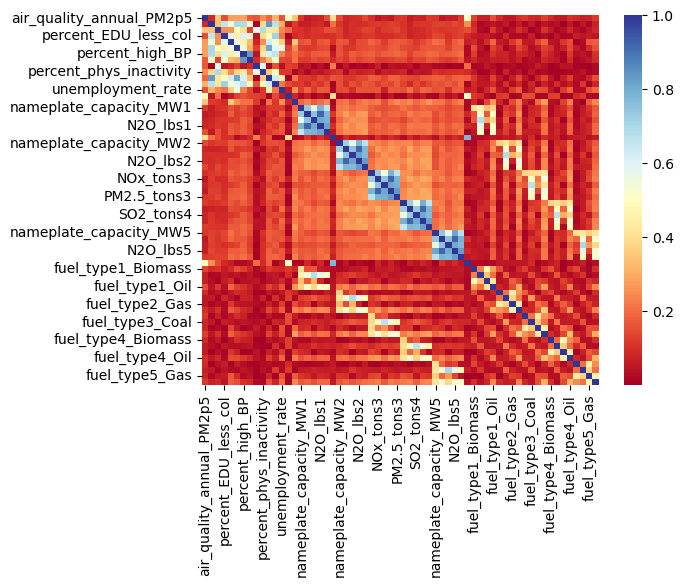

In [91]:
%matplotlib inline
import seaborn as sns
sns.heatmap(X.corr().abs(),cmap="RdYlBu")

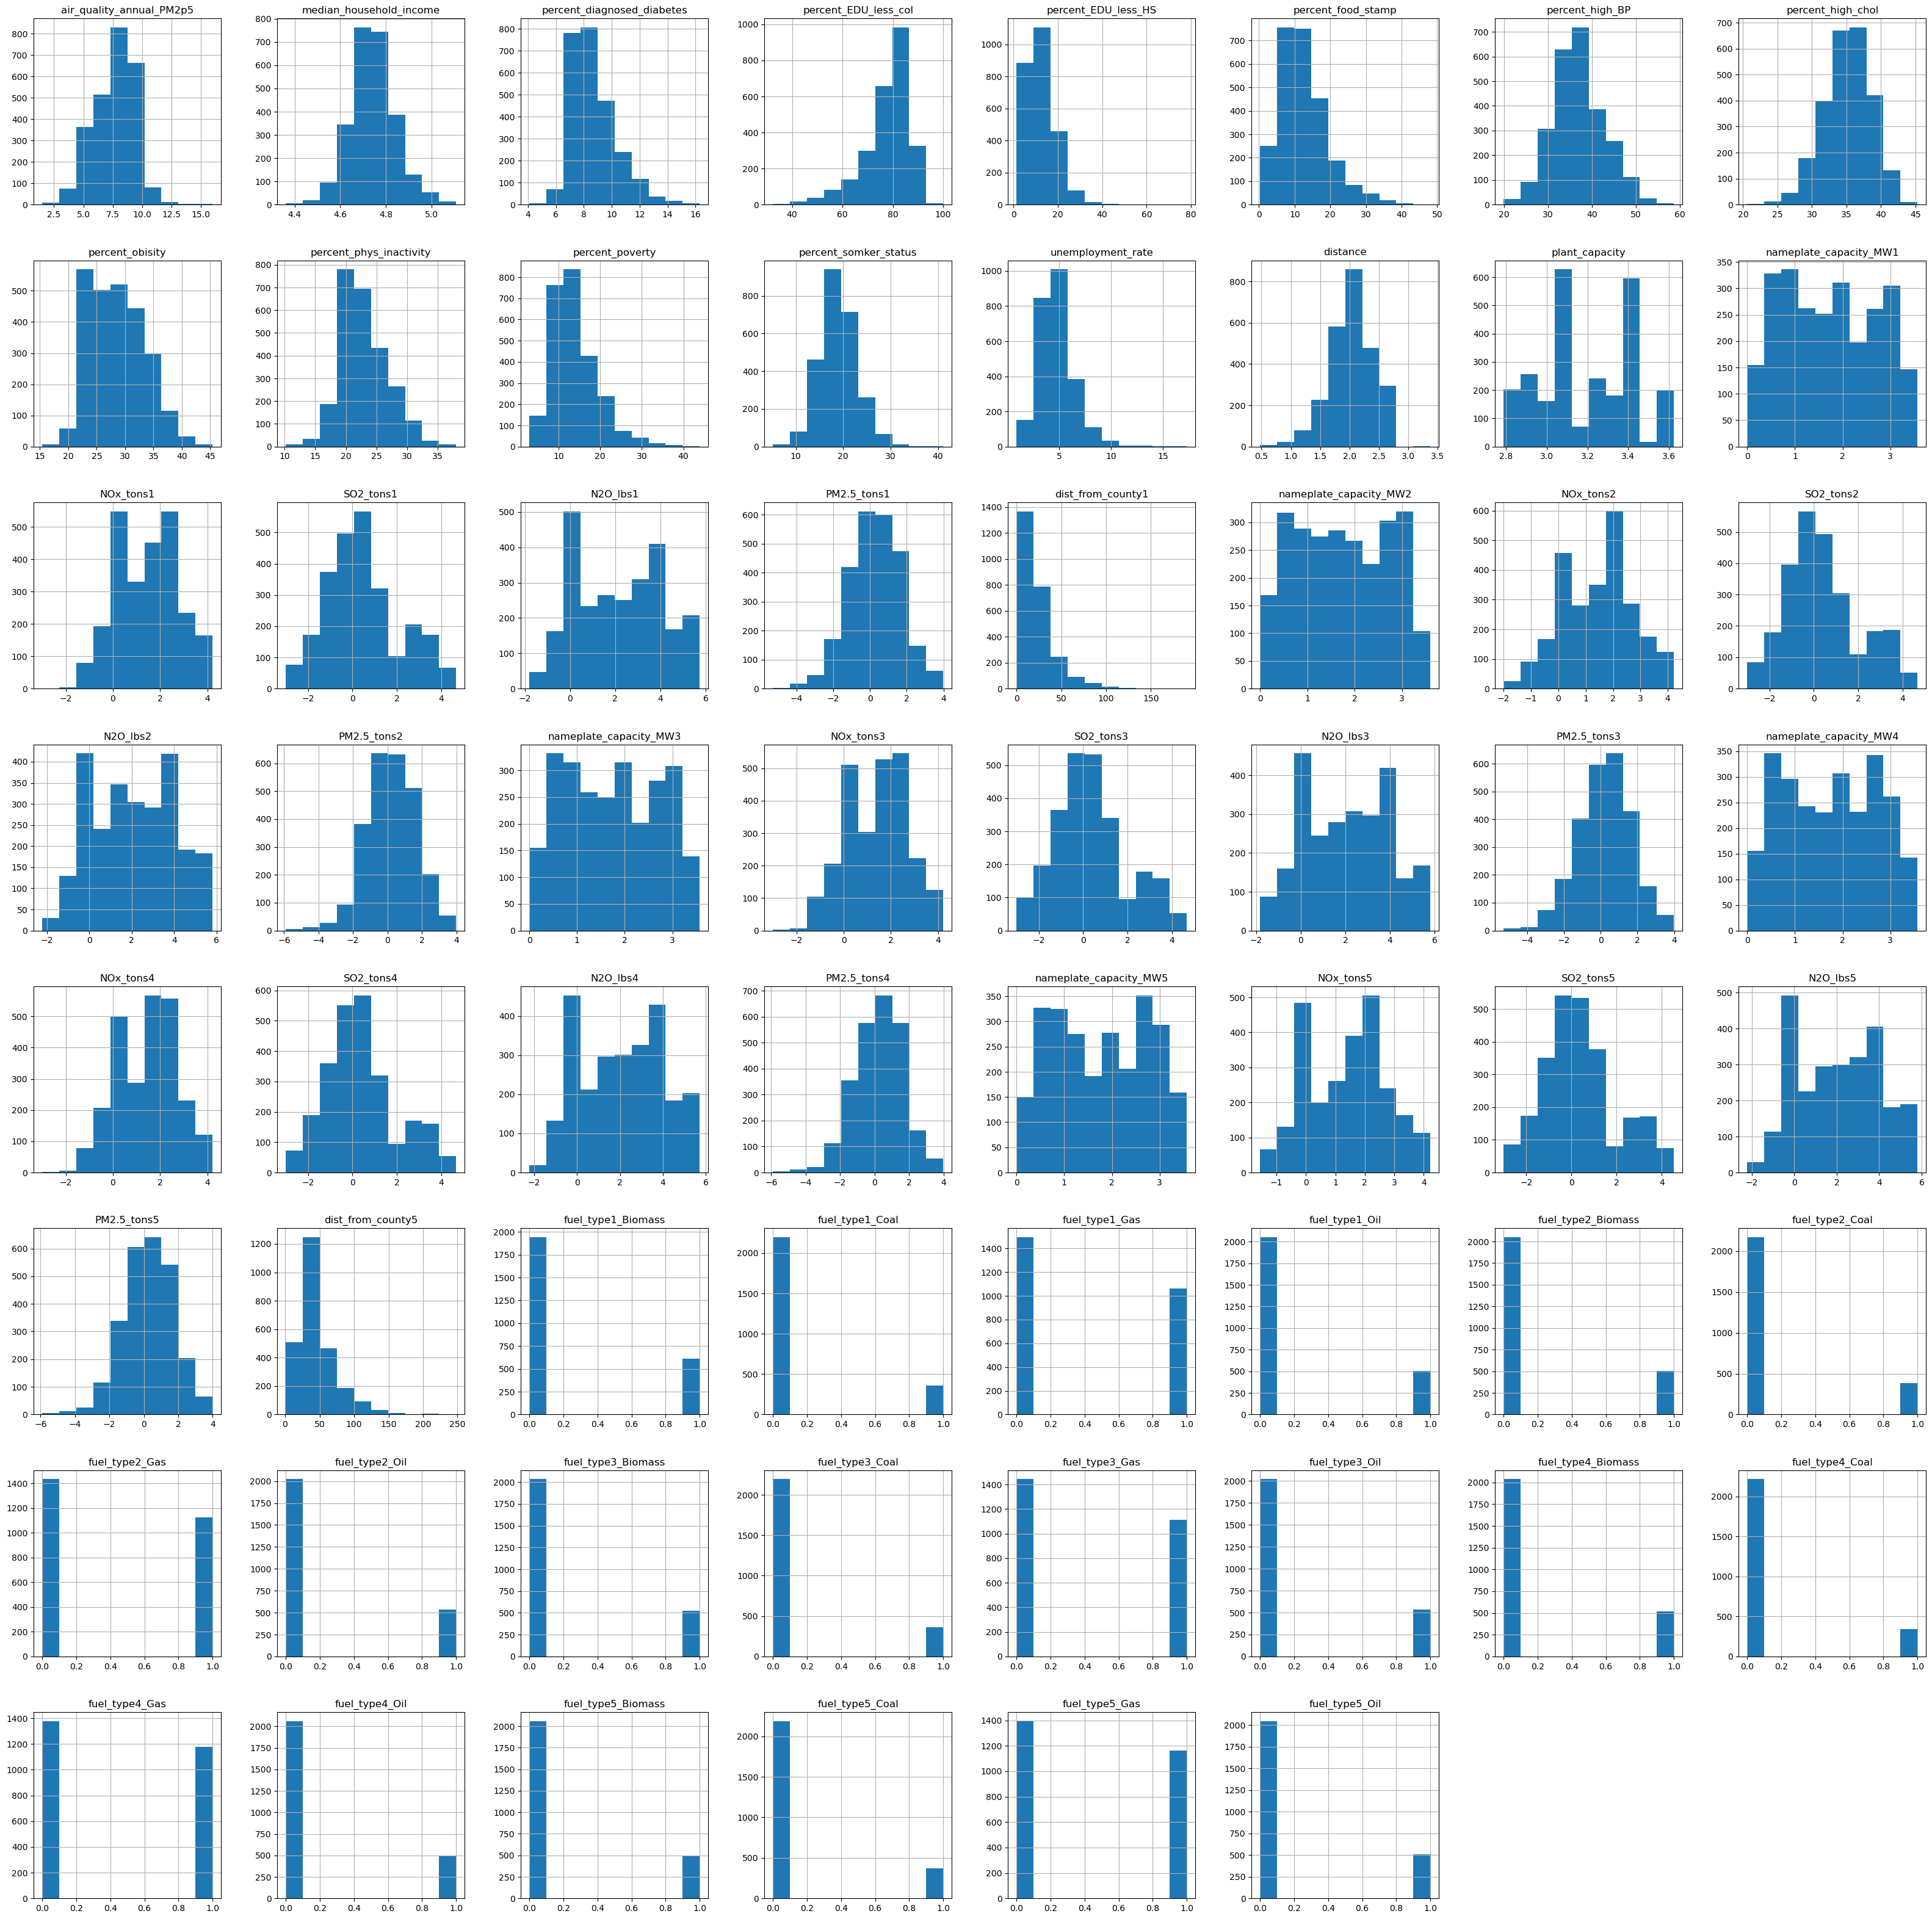

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
X.hist(figsize=(40,40))
plt.show()

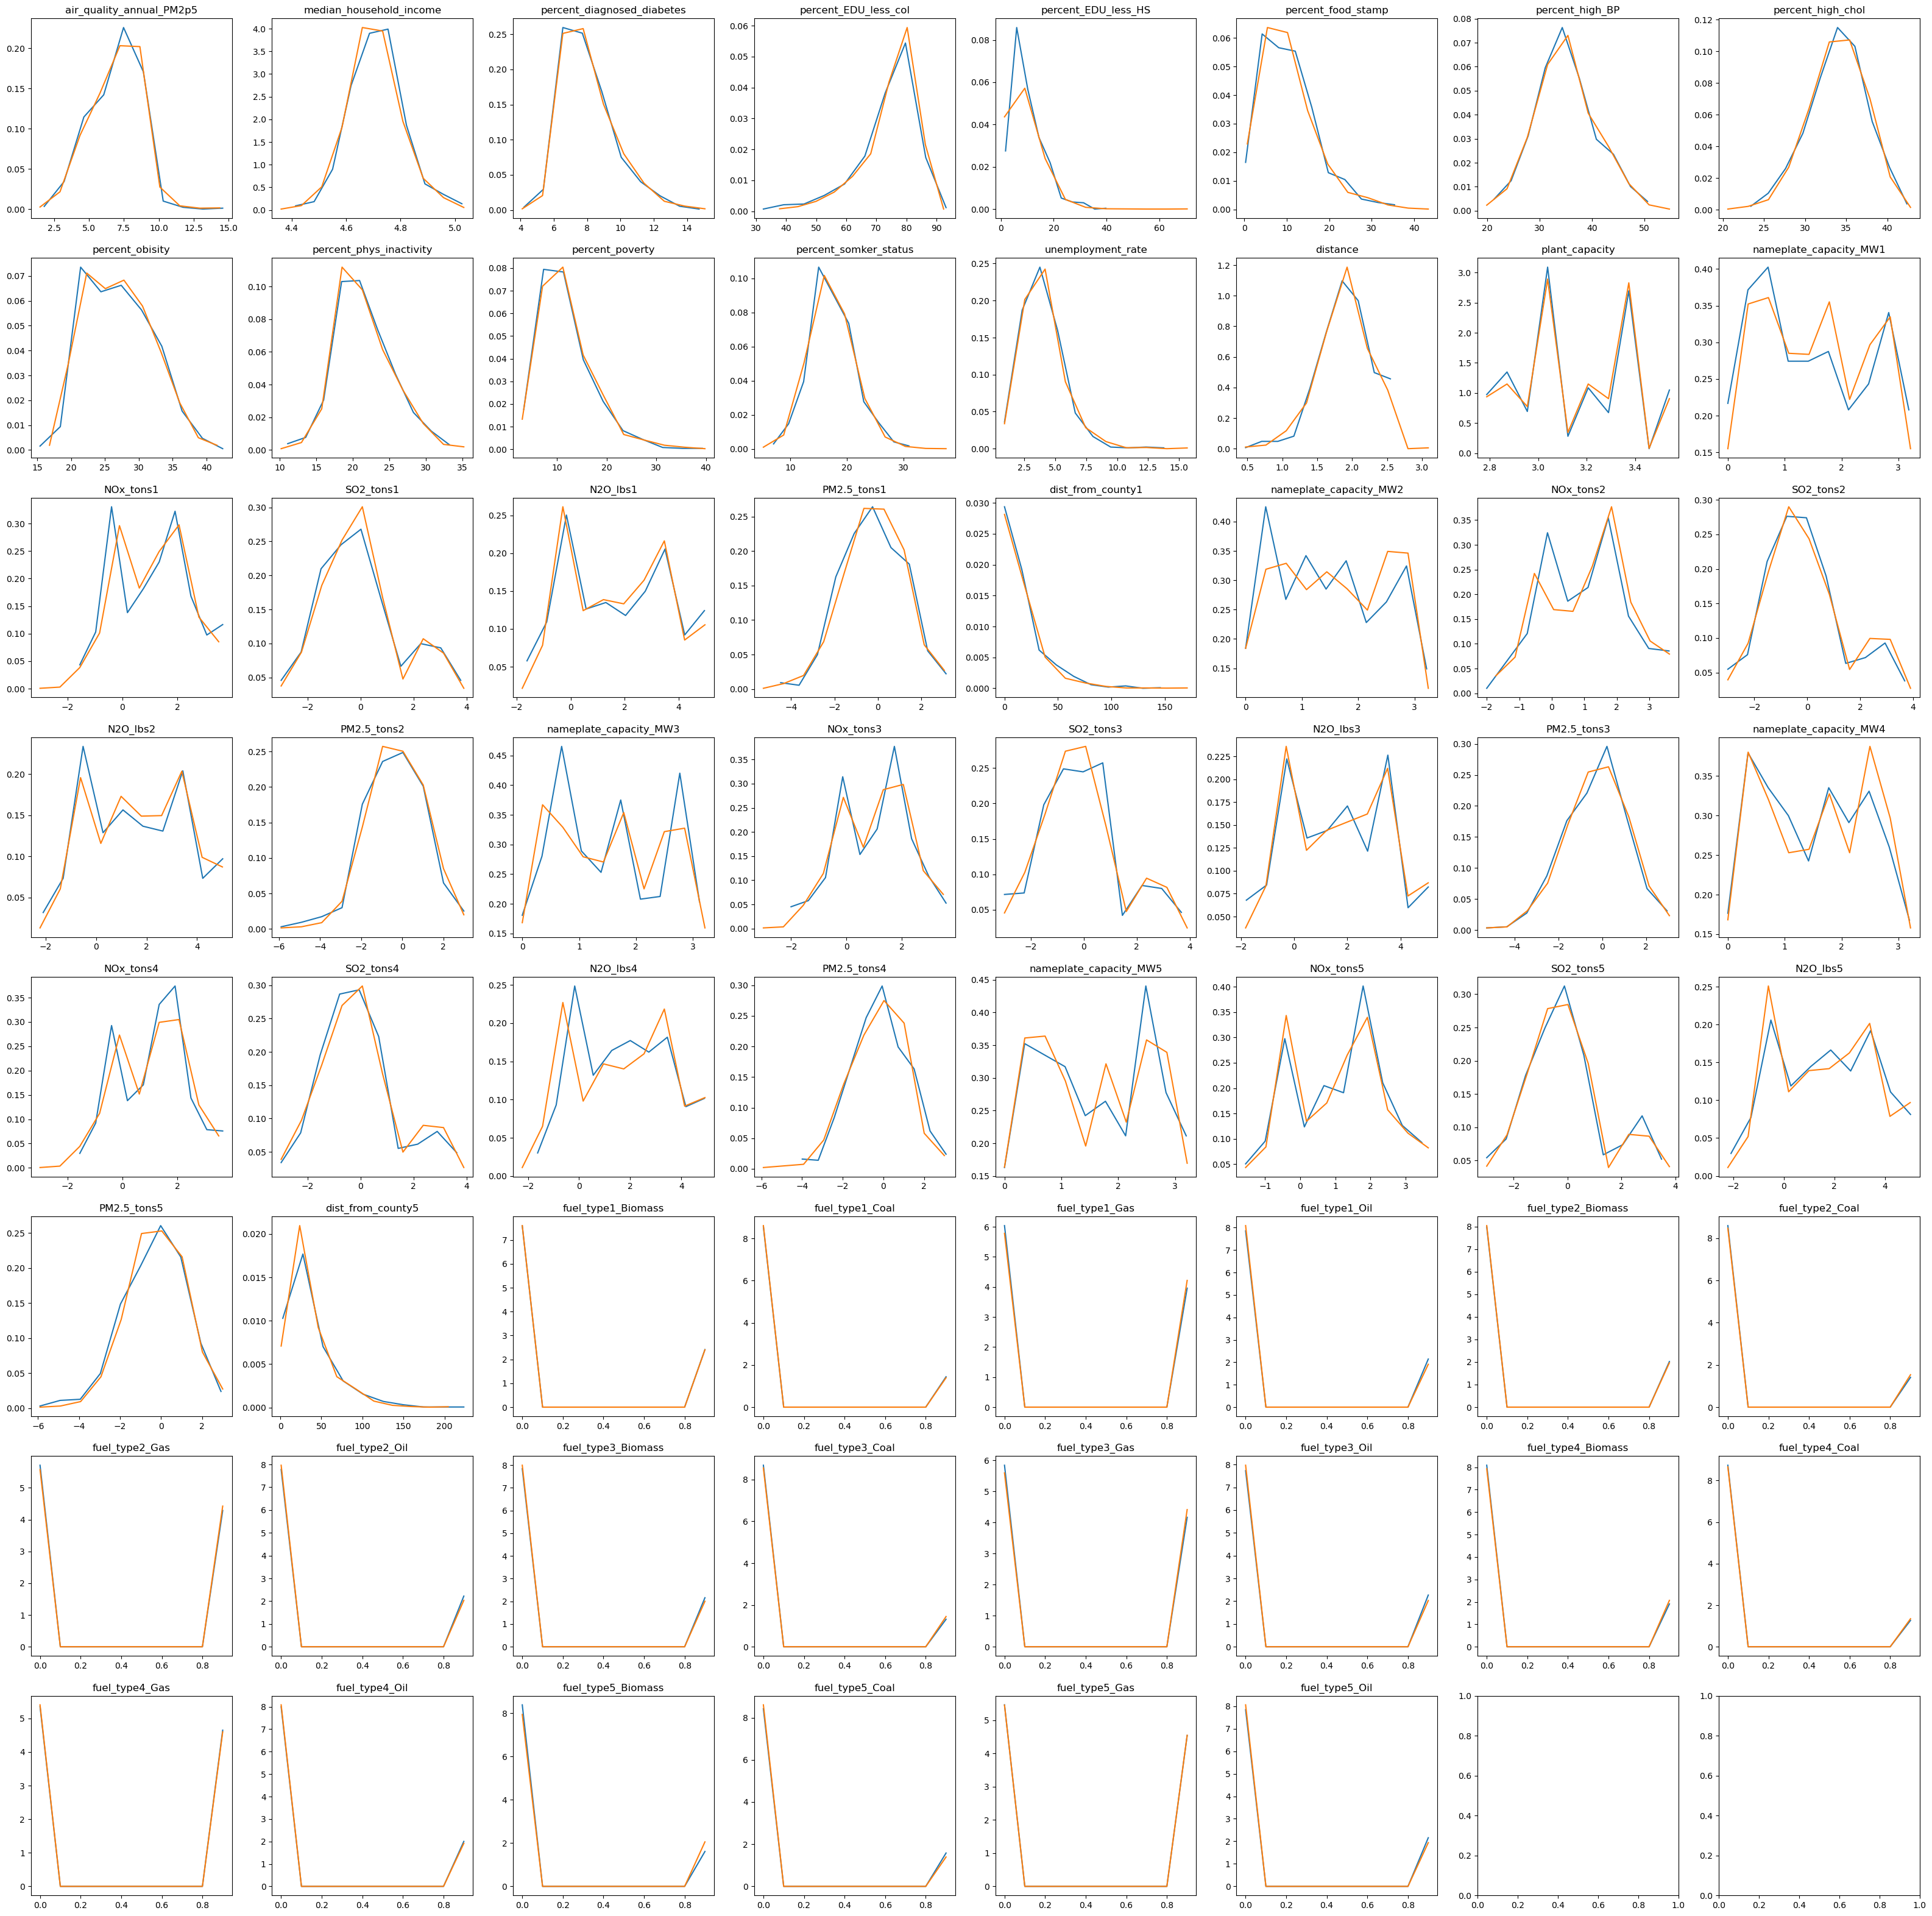

In [93]:
fig, ax = plt.subplots(8,8,figsize=(40, 40))
j = 0
for i in X_test.columns:
    
    d_test = np.array(X_test[i])
    d_train = np.array(X_train[i])
    b1,d1 = np.histogram(d_test,density=True)
    b2,d2 = np.histogram(d_train,density=True)
    ax[int(j/8),j-int(j/8)*8].plot(d1[:-1],b1,d2[:-1],b2)
    ax[int(j/8),j-int(j/8)*8].set_title(X_test.columns[j])
    j = j +1
plt.show()

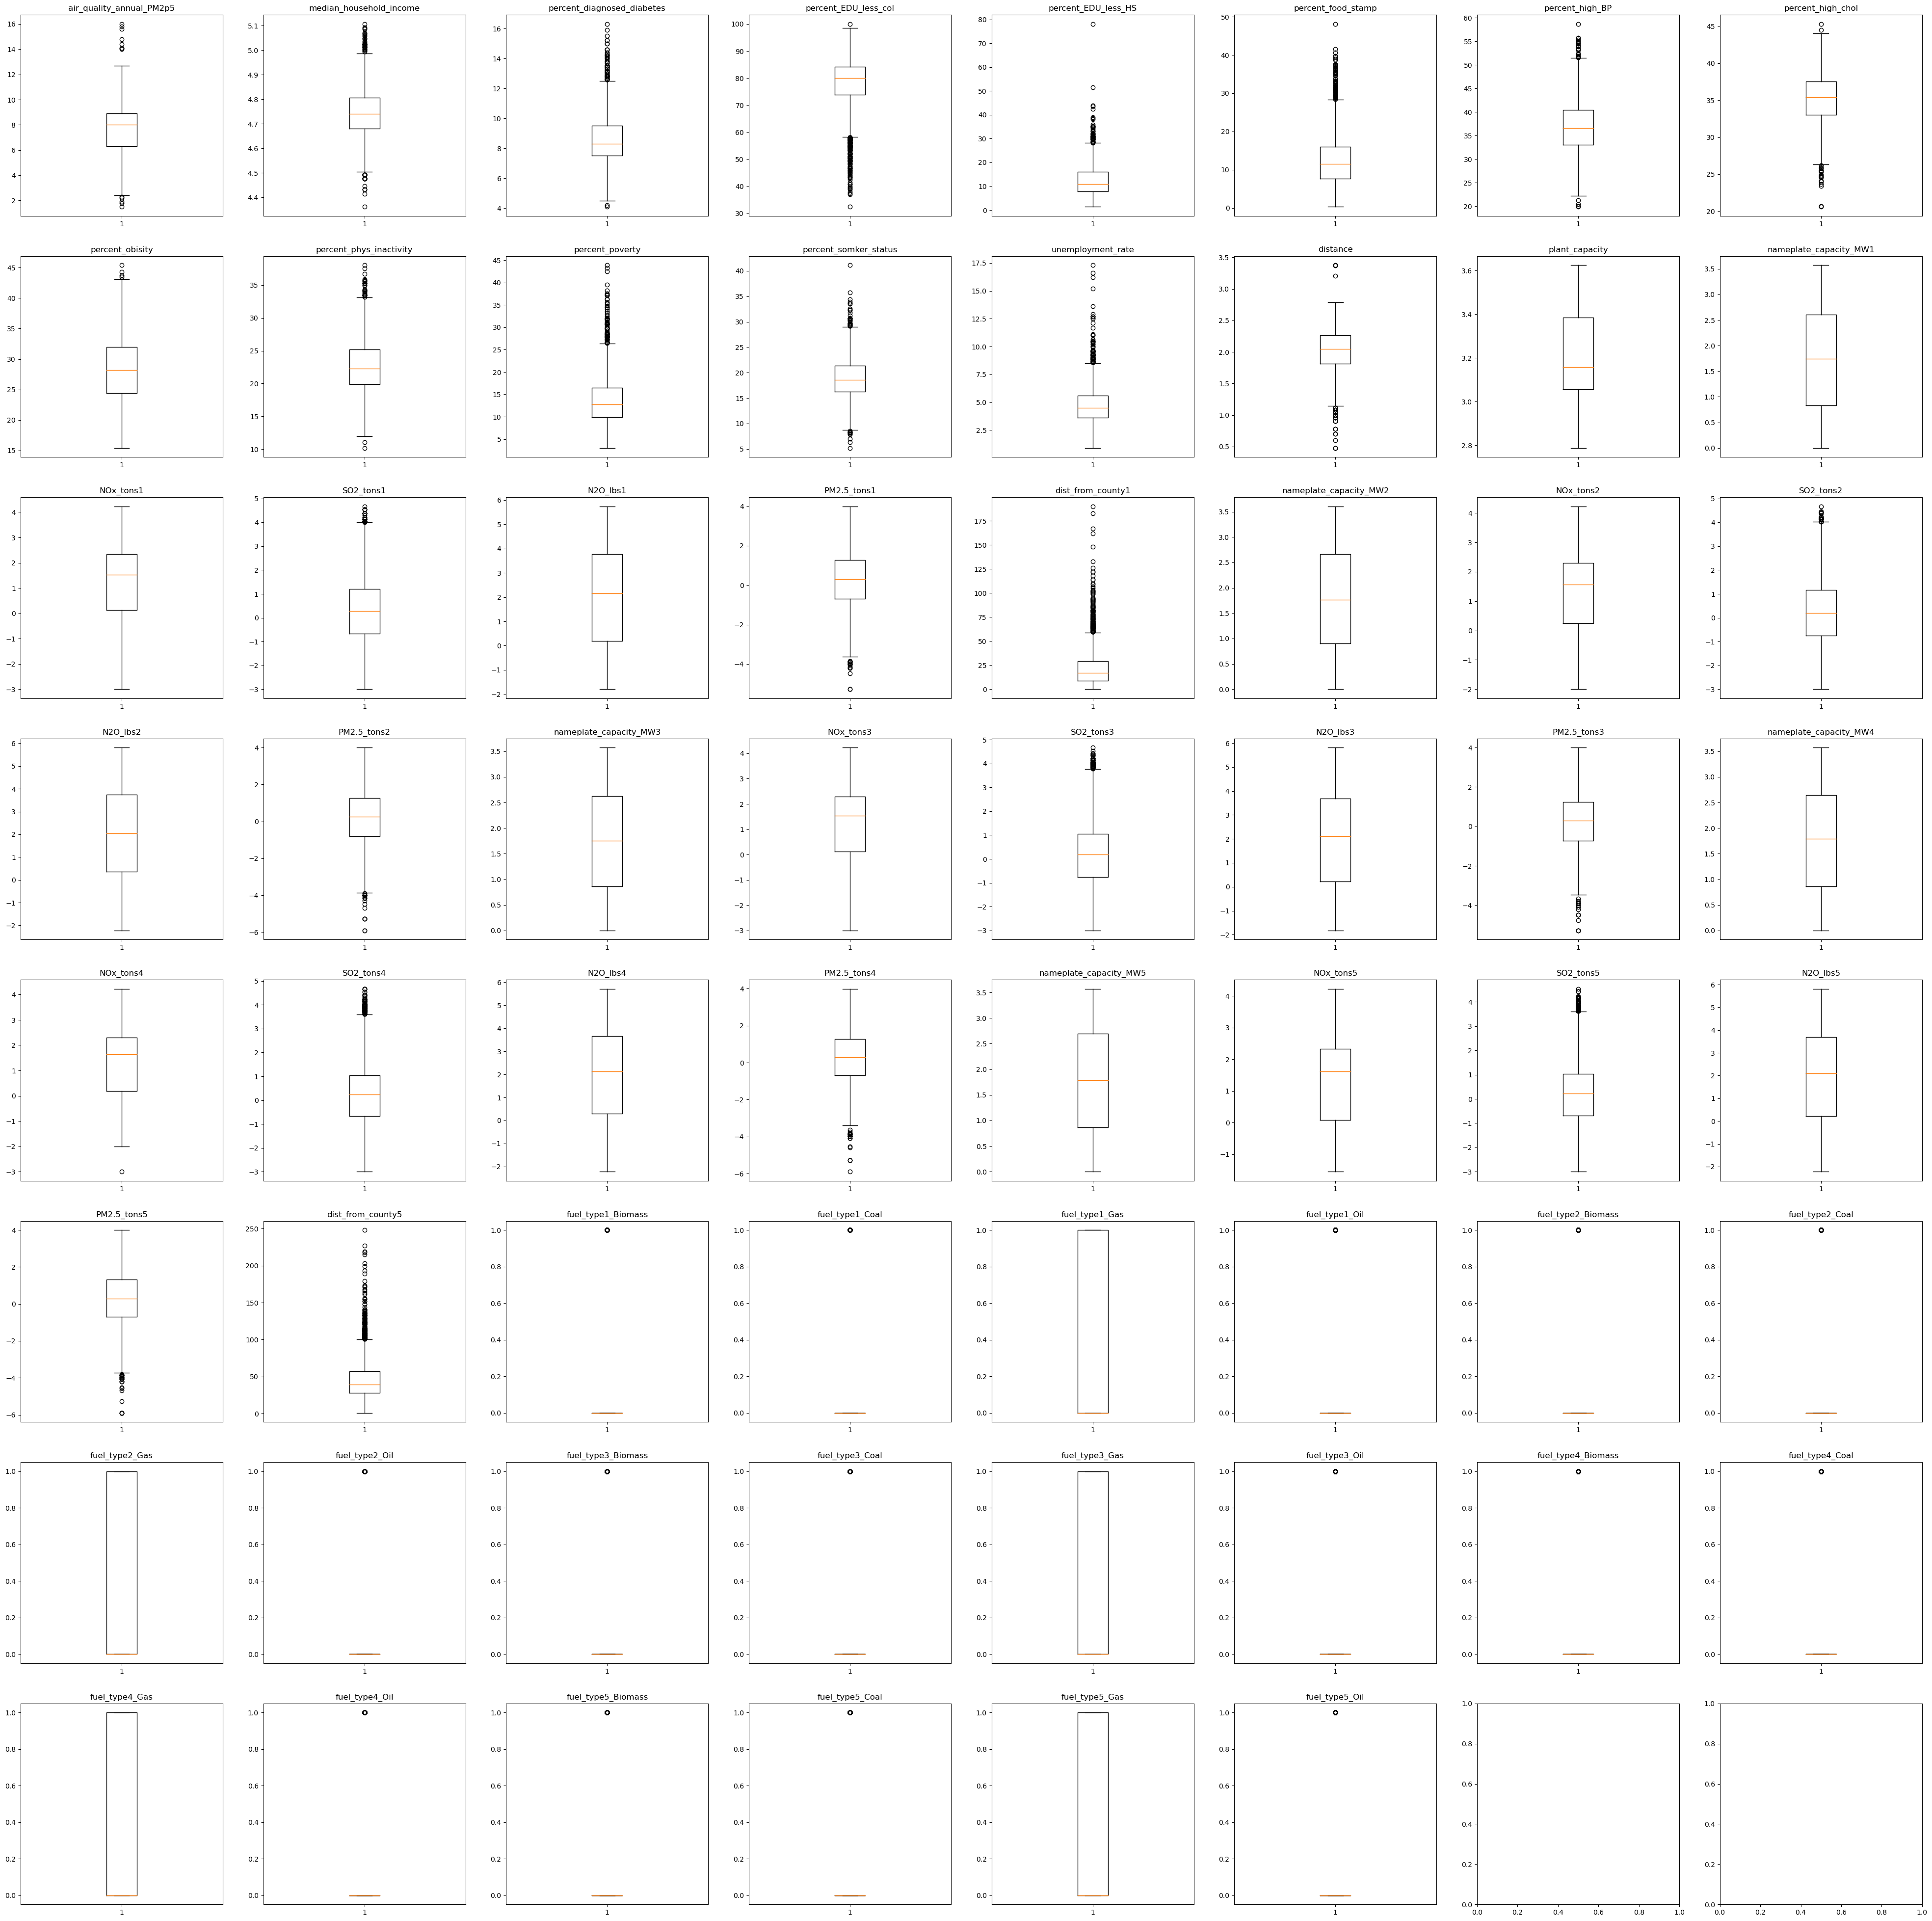

In [18]:
fig, ax = plt.subplots(8,8,figsize=(50, 50))
j = 0
for i in X_test.columns:
    ax[int(j/8),j-int(j/8)*8].boxplot(X[i])
    ax[int(j/8),j-int(j/8)*8].set_title(X.columns[j])
    j = j +1
plt.show()

In [98]:
new_feat = X.columns.drop(["percent_diagnosed_diabetes",'percent_EDU_less_col','percent_food_stamp',
                         'percent_poverty','unemployment_rate','dist_from_county1','dist_from_county5'])

In [99]:
val_xg_clean2={}
new_X = X[new_feat]
X_train, X_test, y_train, y_test = train_test_split(new_X, y, random_state=1)
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
for tar in tar_list:
    model_str = "./random_forest_grid_2"+str(tar)+".joblib"
    model[tar] = joblib.load(model_str)
    #print(model)
    #test = model.best_estimator_
    model[tar].fit(X_train_scaled,y_train[tar])
    pred = model[tar].predict(X_test_scaled)
    pred_train = model[tar].predict(X_train_scaled)
    val_xg_clean2[tar] = [mean_squared_error(y_test[tar], pred),r2_score(y_test[tar], pred)
                   ,r2_score(y_train[tar],pred_train)]

[13:43:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[13:43:58] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[13:43:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[13:43:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[13:43:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[13:43:59] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[13:44:00] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[13:44:00] WARNING: 

In [100]:
val_xg_clean2

{'cardio_death': [834.211038133245, 0.6563731136685531, 0.9624391113689318],
 'total_cancer': [5291.289116992153, 0.49725173755550234, 0.9898968837211803],
 'bladder': [59.992679764110676, 0.43861264365879116, 0.963541561771978],
 'brain': [7.866305508817647, 0.3921798184387787, 0.8935243459310854],
 'breast': [1146.490243514609, 0.36779943008269467, 0.953554925107865],
 'breast_insitu': [104.53677071898645, 0.4906379058941326, 0.9411115511613407],
 'cervix': [10.730184079192261, 0.34686970190963395, 0.9761342632446047],
 'colon': [231.82134094334953, 0.3292109062995001, 0.9040778781174226],
 'esophagus': [0.3159197364351645, 0.11923309641040081, 0.9289443737812726],
 'kidney and renal': [35.0736820040083,
  0.35555151527410367,
  0.9113601317241851],
 'leukemia': [20.801454868106813, 0.38083556007775343, 0.9165657056986748],
 'liver': [3.2042061327268345, 0.276119429942867, 0.9731986677789205],
 'lung': [347.2078394267516, 0.5410838824682833, 0.9248006314077635],
 'melanoma': [96.0891

In [104]:
model["total_cancer"]

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=60, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [109]:
new_X = X[new_feat]
new_RF_eval = {}
X_train, X_test, y_train, y_test = train_test_split(new_X, y, random_state=1)
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
for tar in tar_list:
    new_RF = RandomForestRegressor(n_estimators=500, #model[tar].n_estimators,
                                   max_depth=100,#model[tar].max_depth,
                                   min_samples_split=5,
                                   bootstrap=True)#n_estimators=500,bootstrap=True,warm_start=True)
    new_RF.fit(X_train_scaled,y_train[tar])
    pred = new_RF.predict(X_test_scaled)
    pred_train = new_RF.predict(X_train_scaled)
    new_RF_eval[tar] = [mean_squared_error(y_test[tar], pred),r2_score(y_test[tar], pred)
                     ,r2_score(y_train[tar],pred_train)]

In [110]:
new_RF_eval

{'cardio_death': [862.2814494373799, 0.6448103944122031, 0.9369944094288397],
 'total_cancer': [6217.437953058966, 0.40925433128973654, 0.9033567919987011],
 'bladder': [60.18768646630756, 0.43678784940979976, 0.9015488290473564],
 'brain': [8.141801611328265, 0.3708925583826177, 0.8922004540982813],
 'breast': [1183.6922584546435, 0.3472854002597603, 0.887489791985136],
 'breast_insitu': [105.08645423213467, 0.4879595378574414, 0.9056698990369227],
 'cervix': [11.014335990788751, 0.32957379893590477, 0.8637829843671021],
 'colon': [230.97463088394778, 0.33166091314987023, 0.89427389037864],
 'esophagus': [0.320538966041421, 0.1063549375363132, 0.8471530506825078],
 'kidney and renal': [35.37508621360028,
  0.3500134743538673,
  0.8800766431826434],
 'leukemia': [21.239772186657277, 0.3677888525868932, 0.8812867887137843],
 'liver': [3.156119038812231, 0.28698306090585723, 0.8775248683757544],
 'lung': [353.9631909968184, 0.5321551102371744, 0.9167988293678024],
 'melanoma': [100.92579

In [94]:
X.columns

Index(['air_quality_annual_PM2p5', 'median_household_income',
       'percent_diagnosed_diabetes', 'percent_EDU_less_col',
       'percent_EDU_less_HS', 'percent_food_stamp', 'percent_high_BP',
       'percent_high_chol', 'percent_obisity', 'percent_phys_inactivity',
       'percent_poverty', 'percent_somker_status', 'unemployment_rate',
       'distance', 'plant_capacity', 'nameplate_capacity_MW1', 'NOx_tons1',
       'SO2_tons1', 'N2O_lbs1', 'PM2.5_tons1', 'dist_from_county1',
       'nameplate_capacity_MW2', 'NOx_tons2', 'SO2_tons2', 'N2O_lbs2',
       'PM2.5_tons2', 'nameplate_capacity_MW3', 'NOx_tons3', 'SO2_tons3',
       'N2O_lbs3', 'PM2.5_tons3', 'nameplate_capacity_MW4', 'NOx_tons4',
       'SO2_tons4', 'N2O_lbs4', 'PM2.5_tons4', 'nameplate_capacity_MW5',
       'NOx_tons5', 'SO2_tons5', 'N2O_lbs5', 'PM2.5_tons5',
       'dist_from_county5', 'fuel_type1_Biomass', 'fuel_type1_Coal',
       'fuel_type1_Gas', 'fuel_type1_Oil', 'fuel_type2_Biomass',
       'fuel_type2_Coal', 'fuel

In [54]:
feat_imp = {}
for tar in tar_list:
    feat_imp[tar] = model[tar].feature_importances_        

In [70]:
feat_imp_df = pd.DataFrame(feat_imp)
feat_imp_df["features"] = X.columns
feat_imp_df.set_index("features",inplace=True)
min_max_feat ={}
X_tar = {}
val_xg_clean_new ={}
for tar in feat_imp_df.columns:
    #min_max_feat[i] = [feat_imp_df[i]),)]
    min_f = feat_imp_df[feat_imp_df[tar] <= 0.0025].index.values
    print(min_f)
    if len(min_f) > 0:
        X_tar[tar] = X.columns.drop(min_f)
        new_X = X.drop(columns=min_f)
    else:
        new_X = X
    X_train, X_test, y_train, y_test = train_test_split(new_X, y, random_state=1)
    scaler = MinMaxScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model[tar].fit(X_train_scaled,y_train[tar])
    pred = model[tar].predict(X_test_scaled)
    pred_train = model[tar].predict(X_train_scaled)
    val_xg_clean_new[tar] = [mean_squared_error(y_test[tar], pred),r2_score(y_test[tar], pred)
                   ,r2_score(y_train[tar],pred_train)]

['fuel_type2_Coal']
[12:58:46] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

['fuel_type1_Gas' 'fuel_type3_Biomass' 'fuel_type4_Biomass'
 'fuel_type5_Coal']
[12:58:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

['fuel_type1_Coal']
[12:58:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

['fuel_type4_Coal']
[12:58:47] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

['fuel_type3_Coal']
[12:58:48] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silent" } are not used.

['fuel_type4_Coal']
[12:58:48] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "silen

In [71]:
val_xg_clean_new

{'cardio_death': [782.5174062228114, 0.677666672449909, 0.9671367158401127],
 'total_cancer': [4875.712928237648, 0.5367374285072001, 0.9909794274304504],
 'bladder': [54.66852447201945, 0.4884339464565568, 0.9738165382771605],
 'brain': [7.224101494306383, 0.441802167871054, 0.912916063731491],
 'breast': [1077.1520965359632, 0.4060340476774593, 0.9591566849550709],
 'breast_insitu': [99.85093124640407, 0.5134699580991371, 0.9507998164895912],
 'cervix': [10.321085959106538, 0.37177089420492127, 0.9820195073066481],
 'colon': [220.74040412370763, 0.36127426826761366, 0.9251542747526091],
 'esophagus': [0.2897247609197516, 0.1922632519007038, 0.9377175983547317],
 'kidney and renal': [33.279889559338876,
  0.3885108955509694,
  0.9216934426570761],
 'leukemia': [18.896373060778032, 0.43754115676413263, 0.9255783019923634],
 'liver': [2.729067689848972, 0.38346067848912835, 0.9787797203377355],
 'lung': [318.7682404311077, 0.5786734437431322, 0.9356864632743612],
 'melanoma': [94.517985

In [47]:
print(len(X.columns))
print(len(X_tar["total_cancer"]))

62
61


2555